# DAAD_ML_LAB_4_Anastasiia Matychenko

# Завантаження даних з файлу "data_lab4.xlsx" з обраного листа

In [57]:
import pandas as pd

data = pd.read_excel('data_lab4.xlsx', sheet_name='1')  
data.head()


,Внутричерепное давление,t36,t35,t34,t33,t32
0,1,37,35,33,28,26
1,2,38,33,30,28,25
2,3,33,34,30,31,29
3,4,45,30,27,28,19
4,5,36,31,29,27,25


# Побудова графіку паралельних координат для аналізу однорідності даних або виділення кластерів:

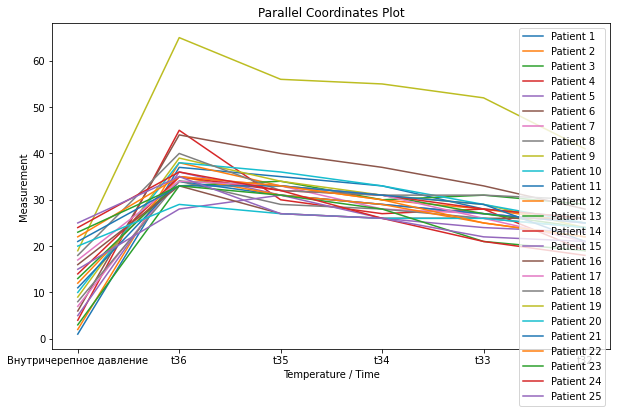

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(data.columns, data.iloc[i], label="Patient {}".format(i+1))
plt.xlabel("Temperature / Time")
plt.ylabel("Measurement")
plt.title("Parallel Coordinates Plot")
plt.legend(loc='upper right')
plt.show()


# Розбиття пацієнтів на кластери за допомогою алгоритму k-середніх

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Підготовка даних для кластеризації

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Застосування алгоритму k-середніх

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

Візуалізація результатів кластеризації на графіку паралельних координат

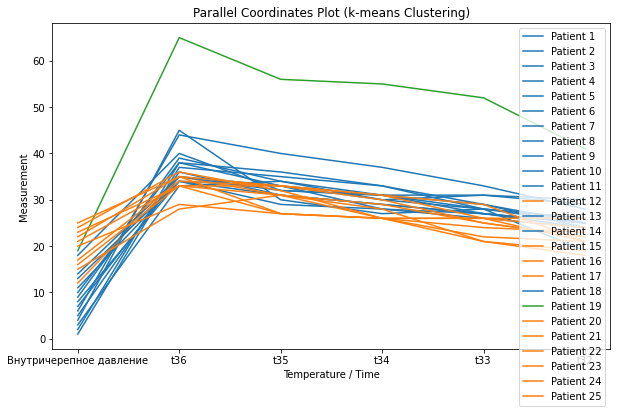

In [63]:
plt.figure(figsize=(10, 6))
for i, label in enumerate(kmeans_labels):
    plt.plot(data.columns, data.iloc[i], label="Patient {}".format(i+1), color=plt.cm.tab10(label))
plt.xlabel("Temperature / Time")
plt.ylabel("Measurement")
plt.title("Parallel Coordinates Plot (k-means Clustering)")
plt.legend(loc='upper right')
plt.show()

# Розбиття пацієнтів на кластери за допомогою різних ієрархічних алгоритмів кластеризації та відображення дендрограм

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage



Застосування агломеративної кластеризації

In [65]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_data)

Візуалізація дендрограми для агломеративної кластеризації

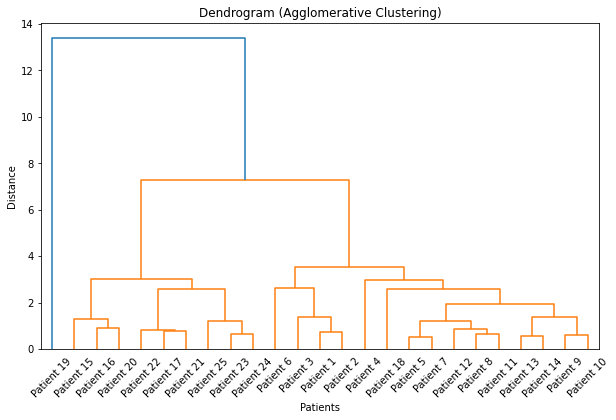

In [66]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(scaled_data, method='ward'), labels=[f"Patient {i+1}" for i in range(len(data))])
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.title("Dendrogram (Agglomerative Clustering)")
plt.show()

# Оцінка оптимальної кількості кластерів за допомогою індексу якості кластеризації

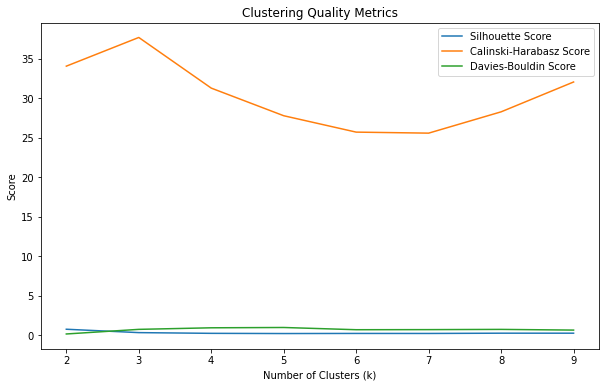

In [47]:
from sklearn import metrics

Оцінка оптимальної кількості кластерів засобами індексів якості кластеризації

In [ ]:
k_values = range(2, 10)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(metrics.silhouette_score(scaled_data, labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(scaled_data, labels))
    davies_bouldin_scores.append(metrics.davies_bouldin_score(scaled_data, labels))

Відображення результатів оцінки

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, label='Silhouette Score')
plt.plot(k_values, calinski_harabasz_scores, label='Calinski-Harabasz Score')
plt.plot(k_values, davies_bouldin_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Clustering Quality Metrics')
plt.legend()
plt.show()

# Порівняння розбиття, отриманих різними алгоритмами, за допомогою "ручного" співставлення кластерів та індексу Rand

In [51]:
from sklearn.metrics import adjusted_rand_score

manual_labels = [0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1,1,0,0,1,2,1,2,2,2]
kmeans_rand_score = adjusted_rand_score(manual_labels, kmeans_labels)
agg_rand_score = adjusted_rand_score(manual_labels, agg_labels)

print("K-means Rand Score:", kmeans_rand_score)
print("Agglomerative Rand Score:", agg_rand_score)


K-means Rand Score: 0.1285503504241977
Agglomerative Rand Score: 0.07862407862407862
